In [29]:
"""
Problem 1: Knowledge Q&A
(1) What is data mining?
    - Data mining is the process of discovering unknown and useful patterns in large datasets.
      
(2) When we are discussing ”data mining” in this class, it includes the whole mining
process. What are the processes we are referring to?
    - When talking about mining, the processes that we are referring to are data preparation, which
      include data cleaning, data integration, data transformation, and data selection.
      Then after we have our data prepped we then apply our data mining process, which applies the statistical
      techniques to transform our data into patterns. After we go through the pattern/model evaluation to dictate
      which patterns are important to what we are trying to find. Finally, once we discover these important patterns,
      we present them to the customer.
(3) What is the relationship between databases and data mining?
    - Databases have a big role when it comes to data mining because they are used to structure large datasets that are
      used for mining. Since the data is structured it allows for data preprocessing where we need to make sure our data
      is ready for mining.
(4) Based on whether data have clear structures, how can we categorize data? Name
one example of each.
    - We can categorize data in three ways, they can be structured, semi-structured, or unstructured.
        - Structured: students table where the columns are (student id, name, graduation year, class)
        - Semi-Structured: customers collection where each customer has a key:value pair ex. {name: James Doe, email: jdoe@gmail.com, location: Reseda, CA}
        - Unstrctured: This could be like images since the data is just pixel values that need to be processed.

(5) Describe the difference between an interval-scaled attribute and a ratio-scaled
attribute. List one example of each, excluding examples from the slides (temper-
ature).
    - Interval-scaled attributes are measured on a scale of equal sized units, whose values have order and can be positive, 0, or negative. They also have no true zero point
        - Example: Model year of laptops
    - Ratio-scaled attributes inherent a zero-point and the values can be a magnitude larger than the unit of measurement.
        - Example: Number of steps taken.
(6) What is the name of this plot? What statistical information can we gather from
this plot?
    - This plot is a box plot and the information it is giving us is that the data is slightly positively skewed since the right whisker is longer than the left. Also the median
      is more to the left of the box center. 

(7) Pearson correlation and χ2 correlation are two correlation methods, but they are
suited for different data types. What types are they suited for?
    - x^2 correlation is suited for nominal data, while Pearson correlation is suited for interval and ratio data.
(8) Regarding all the visualizations we have learned, which figure best describes
correlation?
    - scatter plots are the best visualization for correlation because it allows us to see a pattern when comparing two different 
      data points
(9) What is metadata?
    - Metadata is data about the data. It is information that describes the dataset's structure
(10) List three cleaning missing data strategies that first come to mind.
    - First data cleaning strategy that comes to mind is data smoothing. where we break down the data into bins, and the values in each bin are replaced with the mean or median
      of that bin. Second strategy that comes to mind is just by filling in missing values manually. Third strategy that comes to mind is ignoring the entry fully if it is missing
      values, so we just delete it from our dataset.

Problem 2: Identify data types (20%)
Given a sample dataset that describe the vehicle information, for each attribute, answer
following questions:
Last 4 VIN | Vehicle Type | Clean Title | Safety Level | Number of Accidents | Mileage (km)
------------------------------------------------------------------------------------------
13C2       | Sedan        | Yes         | A+           | 0                   | 35,678
24F1       | SUV          | No          | B+           | 2                   | 75,421
3VD3       | Truck        | Yes         | A            | 0                   | 123,560
T54N       | Coupe        | No          | B-           | 3                   | 25,982
1. Which data type (Nominal, Binary, Ordinal, Numeric)?
    - Nominal: Vehicle Type, Last 4 VIN (Categories with no order hierarchy)
    - Binary: Clean Title (Only two options)
    - Ordinal: Safety Level (Categories that have hierarchy)
    - Numeric: Mileage, Number of Accidents (Numeric Value)
2. Is it continuous or discrete?
    - Discrete: Number of Accidents (no fractional values of an accident)
    - Continous: Mileage (You can have a fraction of a mile)
3. If it is numeric data, does it belong to a ratio-based or interval-based attribute?
    - Both numeric data are interval-based attributes because they both have a true 0.
"""

"\nProblem 1: Knowledge Q&A\n(1) What is data mining?\n    - Data mining is the process of discovering unknown and useful patterns in large datasets.\n\n(2) When we are discussing ”data mining” in this class, it includes the whole mining\nprocess. What are the processes we are referring to?\n    - When talking about mining, the processes that we are referring to are data preparation, which\n      include data cleaning, data integration, data transformation, and data selection.\n      Then after we have our data prepped we then apply our data mining process, which applies the statistical\n      techniques to transform our data into patterns. After we go through the pattern/model evaluation to dictate\n      which patterns are important to what we are trying to find. Finally, once we discover these important patterns,\n      we present them to the customer.\n(3) What is the relationship between databases and data mining?\n    - Databases have a big role when it comes to data mining becau


Problem 3: Programming: clean the outliers (20%)
• In this problem, you will use the empirical rule we discussed in class to filter out
the outliers.
• Use the same dataset we used in class, ”adult” from UCIML repository. Instead
of age, we will work on ”education-num” attribute.
• Use 1.5 IQR rule to filter out the outliers.
• Use boxplot to visualize the distribution before and after the outlier removal.
Hint:
• Use pandas.Series.between() function to choose the data in a certain range.
• You can plot multiple boxplots in one figure by putting them into a list:
2
"""

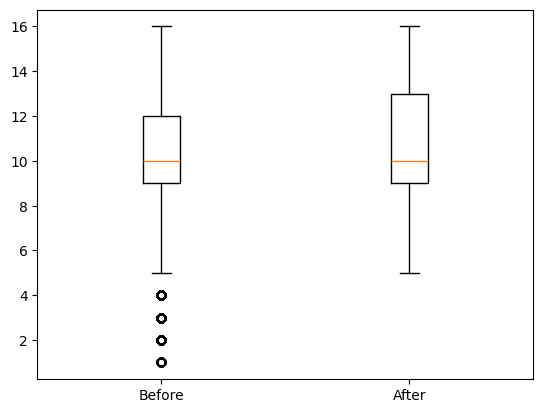

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# load data into data frame
df = pd.read_csv("adult.csv")
plot_before = df['education-num']

# filter out data
filtered_plot = df[df['education-num'].between(5,16)]

plt.boxplot([plot_before, filtered_plot['education-num']], tick_labels=["Before", "After"])
plt.show()


Problem 4: Programming: Filling missing values (30%)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
# load data into data frame

df = pd.read_csv("adult.csv")
candidates = ["education", "relationship", "race", "sex"]

In [32]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    return v


In [33]:
# alg to find attr with the most corr
scores = {}
for col in candidates:
    valid = df[[col, "native-country"]].dropna()
    if valid.empty:
        scores[col] = 0.0
    else:
        confusion_matrix = pd.crosstab(valid[col], valid["native-country"])
        scores[col] = cramers_v(confusion_matrix)
best_attr = max(scores, key=scores.get)
report = pd.Series(scores).sort_values(ascending=False)
best_attr
report

race            0.405967
education       0.130504
relationship    0.079025
sex             0.061276
dtype: float64

In [34]:
# check last 50 entries
df.tail(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48792,34,Federal-gov,408813,HS-grad,9,Married-civ-spouse,Craft-repair,Wife,White,Female,0,0,40,United-States,>50K.
48793,37,Private,115332,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,50,United-States,<=50K.
48794,29,Local-gov,170482,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,2057,40,United-States,<=50K.
48795,34,Private,113688,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,0,34,United-States,<=50K.
48796,27,Private,133770,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,2202,0,52,Philippines,<=50K.
48797,57,Private,161964,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.
48798,30,Private,34572,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,80,United-States,>50K.
48799,21,Private,198259,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48801,57,Private,161944,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,60,United-States,>50K.


In [35]:
# finds the most common country in the subset
row_id = 48826
helper_value = df.loc[row_id, best_attr]
subset = df[df[best_attr] == helper_value]
mode_series = subset["native-country"].mode(dropna=True)
fill_value = mode_series.iat[0]
helper_value

'White'

In [36]:
# overwrite if it’s NaN, if not leave it alone
if pd.isna(df.loc[row_id, "native-country"]):
    df.at[row_id, "native-country"] = fill_value
else:
    print("no change made.")

In [37]:
# verify that the value was updated
df.tail(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48792,34,Federal-gov,408813,HS-grad,9,Married-civ-spouse,Craft-repair,Wife,White,Female,0,0,40,United-States,>50K.
48793,37,Private,115332,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,50,United-States,<=50K.
48794,29,Local-gov,170482,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,2057,40,United-States,<=50K.
48795,34,Private,113688,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,0,34,United-States,<=50K.
48796,27,Private,133770,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,2202,0,52,Philippines,<=50K.
48797,57,Private,161964,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.
48798,30,Private,34572,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,80,United-States,>50K.
48799,21,Private,198259,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48801,57,Private,161944,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,60,United-States,>50K.
